# 2. Bond Pricing, CAPM and APT

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from datetime import datetime

## 2.1 Examples of Bond Pricing

In this section, we work out the solutions to the following problems:

<a id='2.1.1'></a>
### 2.1.1 Nominal rates

**Problem:** An investor receives USD 1,100 in one year in return for an investment of USD 1,000 now. Calculate the percentage return per annum with: a) Annual compounding, b) Semiannual compounding, c) Monthly compounding, d) Continuous compounding. 

It is traditional to quote the interest rate on a yearly basis but then apply the appropriate proportion of that interest rate over each compounding period. Given a nominal interest rate $r$ and dividing a year into $m$ equally spaced compounding periods, the formula for the effective interest rate for the year becomes

\begin{equation} \label{eq:19}
    1 + r_{\text{eff}} = \left( 1 + \frac{r}{m} \right)^m,
\end{equation}

and the nominal interest rate is given by

\begin{equation} \label{eq:20}
    r =  m((1 + r_{\text{eff}})^{\frac{1}{m}} - 1) .
\end{equation}

Then using the equation above, given the effective interest rate, $r_{\text{eff}}$, is equal to 10\% ($\frac{1100 - 1000}{1000}$), the nominal interest rates for different compounding periods are

**(a) Annual compounding $m=1$:**  $r = 10\%$

**(b) Semiannual compounding $m=2$:**  $r = 9.76\%$

**(c) Monthly compounding $m=12$:**  $r = 9.57\%$

**(d) Continuous compounding:** First equation above is given for a year. To calculate the effective rate in $t$ years, the equation becomes
\begin{equation}
    1 + r_{\text{eff}} = \left( 1 + \frac{r}{m} \right)^{mt}.
\end{equation}
For continuous compounding, we let $m$ go to infinity:
\begin{equation} \label{eq:22}
    \lim_{m \rightarrow \infty} \left( 1 + \frac{r}{m} \right)^{mt} 
    =
    \left(
    \underbrace{
        \lim_{m \rightarrow \infty} 
        \left( 1 + \frac{r}{m} \right)^{m}
    }_{e^r}
    \right)^t 
    = e^{rt}
\end{equation}
Then the nominal interest rate for continuous compounding is given by $r = \ln(1+r_{\text{eff}})$ and is equal to 9.53\%.

<a id='2.1.2'></a>
### 2.1.2 Equivalent rates 

**Problem:** What rate of interest with continuous compounding is equivalent to 15\% per annum with monthly compounding? 

The answer is given by solving for $r$ in the following equation:

\begin{equation*}
    e^r = \left( 1 + \frac{0.15}{12} \right)^{12}
\end{equation*}

Then, $r = 14.91\%$.


<a id='2.1.3'></a>
### 2.1.3 Interest calculation

**Problem:** A deposit account pays 12\% per annum with continuous compounding, but interest is actually paid quarterly. How much interest will be paid each quarter on a USD 10,000 deposit? 

We have the effective rate of continuous compounding for $t$ years as

\begin{equation}
    r_{\text{eff}} = e^{rt} - 1.
\end{equation}

Then, if the interest is paid quarterly with a 12\% nominal rate of continuous compounding, quarterly effective rate is given by

\begin{equation*}
    r_{\text{quart}} = e^{0.12/4} - 1 = 3.05\%.
\end{equation*}

Then for a USD 10,000 deposit, an interest of USD 305 ($10,000 \times 3.05\%$) will be payed the first quarter and then a 3.05\% of the money in the account in the following quarters.


## 2.2 Forward Rates

<a id='2.2.1'></a>
### 2.2.1 Forward rates example

Suppose that the one–year interest rate, $r_1$, is 5\%, and the two–year interest rate, $r_2$, is 7\%. If you invest USD 100 for one year, your investment grows to $100 \times 1.05$ = USD 105; if you invest for two years, it grows to $100 \times 1.07^2$ = USD 114.49. The *extra* return that you earn for that second year is $\frac{1.07^2}{1.05} - 1 = 0.090$, or 9.0\%.

**(a)** Investing for only a year allows the investor to get their money back together with interest at the end of one year and allows them to use that money at the end of the year for new investments. However, by investing their money for two years, the investor makes a longer commitment and cannot touch the money until the end of two years; this longer commitment is rewarded with a larger annual interest rate. Therefore, an investor should choose the strategy that fits their other financial commitments and objectives.

**(b)** Suppose we decide to invest USD 100 for one year, with rate $r_1 = 5\%$, and make arrangements for the proceedings to be invested for another year, with rate $f$, at the end of one year. The no arbitrage principle tells us that the proceedings of this investment should be equal to those of an investment of USD 100 for two years, with rate $r_2 = 7\%$. Therefore, the following equation should hold:

\begin{equation*}
     (1 + r_1) (1 + f) = (1 + r_2)^2.
\end{equation*}

Then, plugging in the numbers forward rate is calculated to be

\begin{equation*}
    f = \frac{(1 + r_2)^2}{1 + r_1} - 1 = 9\%.
\end{equation*}

**(c)** Firms often use forward rates to minimize their risks against interest rate changes, which allows them to plan their future operations without much consideration of the interest rate changes. However, interest rates can change in either way, that is settling on a forward rate today can be advantageous or disadvantageous to the investor in the future, depending on the direction of the change.

**(d)** Forward rates are calculated using the forecasted *spot rates*. These calculations yield the *implied forward rates* and can differ from one investor to another due to differences in forecasts. Given $i$-year and $j$-year spot rates, $s_i$ and $s_j$, the implied forward rate between years $i$ and $j$, $f_{i,j}$, is obtained by

\begin{equation}
    f_{i,j} = \left[ \frac{(1 + s_j)^j}{(1 + s_i)^i} \right]^{1 / (j - i)} - 1.
\end{equation}

However, *market forward rates* are usually slightly different from these implied rates due to market imperfections, and an investor might choose to invest if the market rate is higher than their calculated implied rate.


# 2.3 Duration of a Coupon-Bearing Bond

<a id='2.3.1'></a>
### 2.3.1 Macaulay duration

Duration, that is *Macaulay duration*, is the weighted average of the times to each of the cash payments. The times are the future years 1, 2, 3, etc., extending to the final maturity date, which we call $T$. The weight for each year is the present value of the cash flow received at that time divided by the total present value of the bond, i.e.

\begin{equation}
    \text{Duration} = \frac{1 \times PV(C_1) + 2 \times PV(C_2) + \cdots + T \times PV(C_T)}{PV}.
\end{equation}

The Table below shows how to compute duration for the 1\% seven-year Treasuries, assuming annual payments. First, we value each of the coupon payments of USD 10 and the final payment of coupon plus face value of USD 1,010. The present values of these payments add up to the bond price of USD 768.55. Then, we calculate the fraction of the price accounted for by each cash flow and multiply each fraction by the year of the cash flow and find duration to be equal to 6.76.

In [2]:
r = 0.05 # yield to maturity

# create dataframe of coupon payments
df = pd.DataFrame(
    columns=['year 1','year 2','year 3','year 4','year 5','year 6','year 7','Total'],
    index=['Payment','PV(C_t)','PV(C_t)/PV','t * PV(C_t)/PV']
)
df.loc['Payment'] = [10,10,10,10,10,10,1010,1070]

# Get present values of coupon payments and the bond
bond_PV = 0
for i, payment_t in enumerate(list(df.loc['Payment'].values)[:-1]):
    pv_t = payment_t / (1 + r)**(i+1)
    df.iloc[1,i] = pv_t
    bond_PV += pv_t
df.iloc[1,7] = bond_PV

# fill the rest of the frame
for i, pv_t in enumerate(list(df.loc['PV(C_t)'].values)[:-1]):
    weight = pv_t / bond_PV
    df.iloc[2,i] = weight
    df.iloc[3,i] = weight * (i + 1)

# calculate duration
weight_total = 0
duration = 0
for i, d_t in enumerate(list(df.loc['t * PV(C_t)/PV'].values)[:-1]):
    duration += d_t
    weight_total += df.iloc[2,i]

df.iloc[2,7] = weight_total
df.iloc[3,7] = duration

df

,year 1,year 2,year 3,year 4,year 5,year 6,year 7,Total
Payment,10,10,10,10,10,10,1010,1070
PV(C_t),9.52381,9.07029,8.63838,8.22702,7.83526,7.46215,717.788,768.545
PV(C_t)/PV,0.012392,0.0118019,0.0112399,0.0107047,0.0101949,0.00970946,0.933957,1
t * PV(C_t)/PV,0.012392,0.0236038,0.0337197,0.0428187,0.0509746,0.0582567,6.5377,6.75947


<a id='2.3.2'></a>
### 2.3.2 Modified duration

Investors and financial managers track duration because it measures how bond prices change when interest rates change. For this purpose, it is best to use \textit{modified duration} ($D_M$) or \textit{volatility}, which is given by the percentage change in the price of a bond given a change in yield $(\lambda)$, i.e.

\begin{equation}
    D_M = - \frac{1}{P(\lambda_0)} 
    \frac{\mathbf{d}P(\lambda)}{\mathbf{d}\lambda} \text{ at } {\lambda = \lambda_0},
\end{equation}

which is just equivalent to duration divided by one plus the yield to maturity over number of compounding periods, i.e.

\begin{equation}
    D_M = \frac{D}{1 + \lambda / m}.
\end{equation}

For the bond described in the table above, given the yield $\lambda = 5\%$, and number of compounding periods in a year $m=1$ (since the payments are annual), the modified duration is calculated to be

\begin{equation*}
    D_M = \frac{6.7595}{1 + 0.05} = 6.44.
\end{equation*}

Notice that the modified duration is slightly lower than the Macaulay duration. Also, note that the two measures would have been equal to each other under continuous compounding because $m$ would tend to infinity.


<a id='2.3.3'></a>
### 2.3.3 Convenience of duration

Consider a bond with price, $P$, with a face value $F$ that makes $m$ coupon payments of $C/m$ per year, and there are $n$ remaining periods. The bond's yield to maturity, $\lambda$, is such that

\begin{align}
    P &= \frac{F}{(1 + \lambda / m)^n}
    + \sum_{k=1}^n \frac{C/m}{(1 + \lambda/m)^k} \\
    &= \frac{F}{(1 + \lambda / m)^n}
    + \frac{C}{\lambda} \left( 1 - \frac{1}{(1 + \lambda / m)^n} \right). \label{eq:29}
\end{align}

For a bond with $F = 1000$, $m = 2$, Coupon = 10\%, using the equation above, we can obtain the following *price-yield curve* for different maturities.

In [3]:
# calculates the price of a bond given its face value, coupon rate, 
# number of compounding periods in a year, number of remaining periods, and yield to maturity
def calculate_price(face_val, coupon_rate, m, n, ytm):
    coupon = face_val * coupon_rate
    return face_val/(1 + ytm/m)**n + coupon / ytm * (1 - 1/(1 + ytm/m)**n)

In [4]:
face_val = 1000
coupon_rate = 0.1
m = 2

ytm = np.arange(0.001, 0.20, 0.001)

df = pd.DataFrame(index = ytm, columns=['Maturity=3y', 'Maturity=10y', 'Maturity=30y'])
df['Maturity=3y'] = calculate_price(face_val, coupon_rate, m, 6, ytm)
df['Maturity=10y'] = calculate_price(face_val, coupon_rate, m, 20, ytm)
df['Maturity=30y'] = calculate_price(face_val, coupon_rate, m, 60, ytm)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


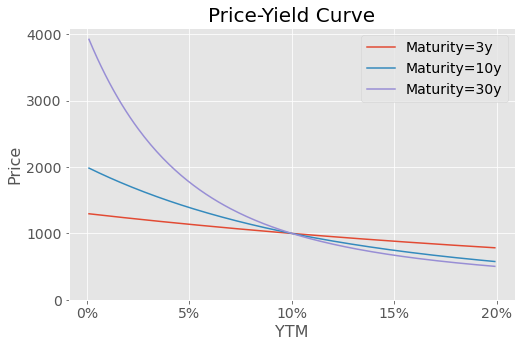

In [5]:
fig, ax = plt.subplots(1,1, figsize=(8,5))

xticks = np.arange(0.0, 0.21, 0.05)
yticks = np.arange(0, 4001, 1000)

df.plot(ax=ax, fontsize=14, xticks=xticks, yticks=yticks)
ax.legend(fontsize=14)
ax.set_xlabel("YTM", fontsize=16); ax.set_ylabel("Price", fontsize=16); ax.set_title("Price-Yield Curve", fontsize=20)

vals = ax.get_xticks()
ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals]);

fig.savefig('Price_Yield_Curve.eps', dpi=200, bbox_inches='tight')

The price-yield curve describes the interest rate risk associated with a bond, and longer the time to maturity, the more sensitive is the price of the bond to the yield as it can be seen from the figure above. However, when there are coupon payments, maturity time does not exactly correspond to sensitivity, and another measure of time length, *duration*, gives a quantitative measure of interest rate sensitivity. Then, larger the duration, the more sensitive is the price of the bond to the interest rate changes.

Given a set of $n$ assets with prices $P_i$ and durations $D_i$ for $i = 1,2,\dots,n$, a portfolio consisting of the aggregate of these securities has price $P$ and duration $D$ given by

\begin{align*}
    P &= P_1 + P_2 + \cdots P_n, \\
    D &= w_1D_1 + w_2D_2 + \dots + w_nD_n,
\end{align*}

where $w_i = P_i / P$, for $i = 1,2,\dots,n$.

Then, if one has an obligation of a certain amount with a certain duration, they can immunize, that is protect, this obligation against changes in interest rates by constructing a portfolio with the same price and duration as the obligation. In this way, duration can be a convenient measure to protect a pension plan against unexpected changes in interest rates.

Finally, just as matching the duration, we can match as many terms as we like to adjust the Taylor series of our portfolio to that of our obligation. Duration was about matching the first-order terms, and *convexity* can be used to match second-order terms.

## 2.4. Capital Asset Pricing Model (CAPM) and Arbitrage Pricing Theory (APT)

In this section we will use the daily returns of 157 European companies to explore the application of \textit{Capital Asset Pricing Model} (CAPM) and \textit{Arbitrage Pricing Theory} (APT).

CAPM can be used to estimate the returns of individual assets in the presence of a risk-free asset, where all investors are assumed to be Markowitz mean-variance investors. According to CAPM, the return of asset $i$, $r_i$, is given by

\begin{equation}
    r_i = r_f + \beta_i(r_M - r_f) + \epsilon_i,
\end{equation}

where $r_f$ is the risk free rate, $r_M$ the market return, and $\epsilon_i$ has zero mean and is uncorrelated with $r_M$. $\beta$ of an asset is given by

\begin{equation}
    \beta_i = \frac{\text{cov}(r_i,r_M)}{\text{var}(r_M)}.
\end{equation}

Then, the expected return of asset $i$ and its variance is given by

\begin{equation}
    \bar{r_i} = r_f + \beta_i(\bar{r_M} - r_f),
\end{equation}

\begin{equation}
    \sigma_i^2 = 
    \underbrace{\beta_i^2\sigma_M^2}_{\text{systematic}}
    + \underbrace{\text{var}(\epsilon_i)}_{\text{nonsystematic}},
\end{equation}

where the variance can be divided into systematic and nonsystematic components. The systematic risk is associated with the market and cannot be diversified, while the nonsystematic risk is uncorrelated with the market and can be reduced by diversification. Therefore, CAPM says that the expected return of an asset/portfolio is not determined by its variance, but only by its beta, which measures the amount of risk from the market portfolio.

In [6]:
# Import libraries
import numpy as np
import pandas as pd
from scipy import stats
import copy
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [7]:
# Read data
mydateparser = lambda x: datetime.strptime(x, "%Y-%m-%d")
df = pd.read_csv("fsp_case_31_BSD.csv", index_col=0, header=[0,1], parse_dates=True, date_parser=mydateparser)

<a id='2.4.1'></a>
### 2.4.1 Non-weighted market return

We first estimate the market return, $r_M$, per day by averaging the returns of the given companies each day. We have 157 companies with data on their returns, but some companies have missing data points so we drop them and continue working with the remaining 141 companies. The *non-weighted* market return is plotted in the figure below. The daily market return has an average value of 0.005\% and a standard deviation of 0.0067.

In [8]:
# non-weighted market returns
market_returns_nw = df['ret'].dropna(axis=1).mean(axis=1)

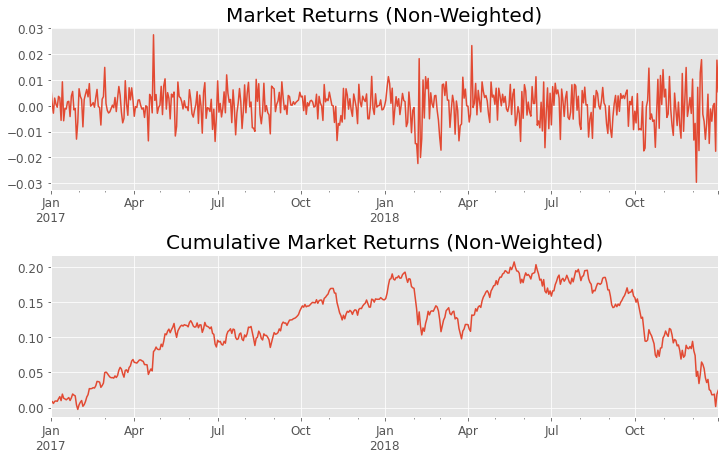

In [9]:
# Plot the figures
fig, axes = plt.subplots(2,1, figsize=(10,6))
fig.tight_layout()
fig.subplots_adjust(hspace=0.4)

market_returns_nw.plot(ax=axes[0], fontsize=12); axes[0].set_title('Market Returns (Non-Weighted)', fontsize=20)
market_returns_nw.cumsum().plot(ax=axes[1], fontsize=12); axes[1].set_title('Cumulative Market Returns (Non-Weighted)', fontsize=20)

fig.savefig('Market_Returns.eps', dpi=200, bbox_inches='tight')

In [10]:
print('Market return mean (non-weighted): ', market_returns_nw.mean())
print('Market return \u03C3 (non-weighted): ', market_returns_nw.std())

Market return mean (non-weighted):  4.720252923319892e-05
Market return σ (non-weighted):  0.006650324555998098


<a id='2.4.2'></a>
### 2.4.2 Non-weighted rolling beta

We calculate a rolling $\beta$ value for each company with a window of 22 days (one trading month). This is done using the previously given equation for $\beta$, that is, we calculate the covariance of each asset with the market and divide this value by the variance of the market return, in the relevant 22-day window. The rolling betas for each of the companies are plotted in the first plot in the figure below. We also present the mean of the rolling betas for each company and their standard deviation during the analyzed period in bar plots. The average $\beta$ value among the companies is 1.0, and the average of the standard deviation in betas is 0.55.

Betas, on average, are not too volatile, which demonstrates the stable correlation of the assets with the market. We can see, however, that there are certain companies with volatile betas, which indicates a non-consistent relationship with the market for the particular company.

In [11]:
returns_nw = df['ret'].dropna(axis=1)
returns_nw['market'] = market_returns_nw

In [12]:
window = 22
betas_df_nw = pd.DataFrame(columns=returns_nw.columns) 

for i in range(0, len(returns_nw)-window+1):
    cov_matrix = returns_nw.iloc[i:i+window].cov()
    betas = cov_matrix['market'] / cov_matrix['market']['market']
    t = returns_nw.index[i+window-1]
    betas_df_nw.loc[t] = betas

betas_stats_nw = pd.DataFrame(index=betas_df_nw.columns, columns=['mean', 'std']) 
betas_stats_nw['mean'] = betas_df_nw.mean()
betas_stats_nw['std'] = betas_df_nw.std()

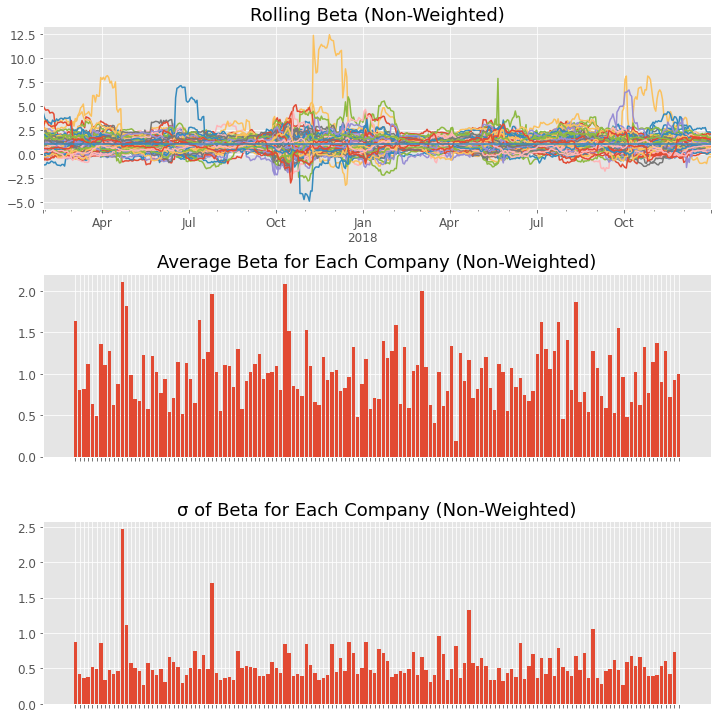

In [13]:
fig, axes = plt.subplots(3,1, figsize=(10,10))
fig.tight_layout()
fig.subplots_adjust(hspace=0.35)


betas_df_nw.plot(ax=axes[0], fontsize=12, legend=False); 
axes[0].set_title('Rolling Beta (Non-Weighted)', fontsize=18); 

axes[1].bar(betas_stats_nw.index, betas_stats_nw['mean']); 
axes[1].set_title('Average Beta for Each Company (Non-Weighted)', fontsize=18); 
axes[1].set_xticklabels(""); axes[1].tick_params(labelsize=12)

axes[2].bar(betas_stats_nw.index, betas_stats_nw['std']); 
axes[2].set_title('\u03C3 of Beta for Each Company (Non-Weighted)', fontsize=18); 
axes[2].set_xticklabels(""); axes[2].tick_params(labelsize=12)


fig.savefig('Rolling_Betas_with_Stats.eps', dpi=200, bbox_inches='tight')

In [14]:
print('average rolling beta among companies (non-weighted): ', betas_stats_nw['mean'].mean())
print('average \u03C3 among companies (non-weighted): ', betas_stats_nw['std'].mean())

average rolling beta among companies (non-weighted):  0.9999999999999998
average σ among companies (non-weighted):  0.549062176093577


<a id='2.4.3'></a>
### 2.4.3 Mcap-weighted market return

We now estimate the market return in a different way (than in [2.4.1](#2.4.1)): we weight the returns of the companies according to their market capitalization. Then, the estimation for the market return, $r_m$ is given by

\begin{equation}
    r_M = \sum_i \frac{\text{mcap}_i \times r_i}{\sum_i \text{mcap}_i}.
\end{equation}

A portfolio of all assets in the market constructed with these weights is also referred to as *the market portfolio*.

The mcap-weighted market return is plotted in the figure below. It has an average value of 0.019\% and a standard deviation of 0.0066.

In [15]:
returns_w = df['ret'].dropna(axis=1)
mcaps = df['mcap'][returns_w.columns]
weights = mcaps.divide(mcaps.sum(axis=1), axis=0)

In [16]:
# mcap-weighted market returns
market_returns_w = (weights*returns_w).sum(axis=1)

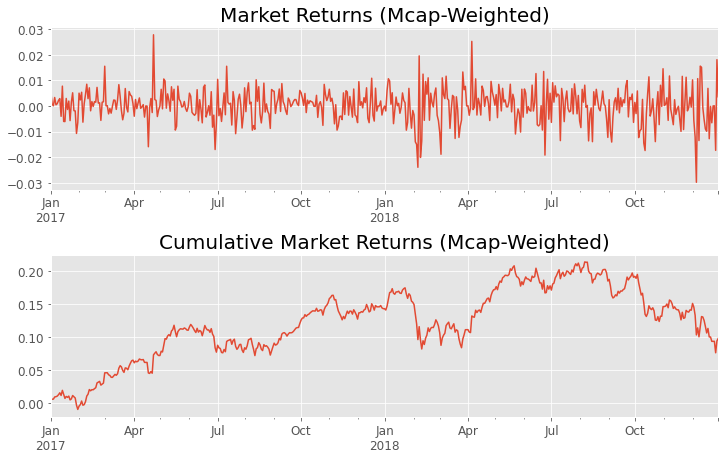

In [17]:
fig, axes = plt.subplots(2,1, figsize=(10,6))
fig.tight_layout()
fig.subplots_adjust(hspace=0.4)

market_returns_w.plot(ax=axes[0], fontsize=12); axes[0].set_title('Market Returns (Mcap-Weighted)', fontsize=20)
market_returns_w.cumsum().plot(ax=axes[1], fontsize=12); axes[1].set_title('Cumulative Market Returns (Mcap-Weighted)', fontsize=20)

fig.savefig('Market_Returns_Weighted.eps', dpi=200, bbox_inches='tight')

In [18]:
print('Market return mean (mcap-weighted): ', market_returns_w.mean())
print('Market return \u03C3 (mcap-weighted): ', market_returns_w.std())

Market return mean (mcap-weighted):  0.00018841990142144186
Market return σ (mcap-weighted):  0.006599318685834854


<a id='2.4.4'></a>
### 2.4.4 Mcap-weighted rolling beta

Now, similar to [2.4.2](#2.4.2), we will be estimating the rolling betas, but using the market return, $r_M$, from [2.4.3](#2.4.3). The rolling betas computed this way are plotted in the figure below together with relevant statistics in bar plots. The average $\beta$ among the companies is 0.96, and the average standard deviation in betas is 0.56.

We note that the values and statistics computed for the betas using different methods yield very similar results.

In [19]:
returns_w['market'] = market_returns_w

In [20]:
window = 22
betas_df_w = pd.DataFrame(columns=returns_w.columns) 

for i in range(0, len(returns_w)-window+1):
    cov_matrix = returns_w.iloc[i:i+window].cov()
    betas = cov_matrix['market'] / cov_matrix['market']['market']
    t = returns_w.index[i+window-1]
    betas_df_w.loc[t] = betas

betas_stats_w = pd.DataFrame(index=betas_df_w.columns, columns=['mean', 'std']) 
betas_stats_w['mean'] = betas_df_w.mean()
betas_stats_w['std'] = betas_df_w.std()

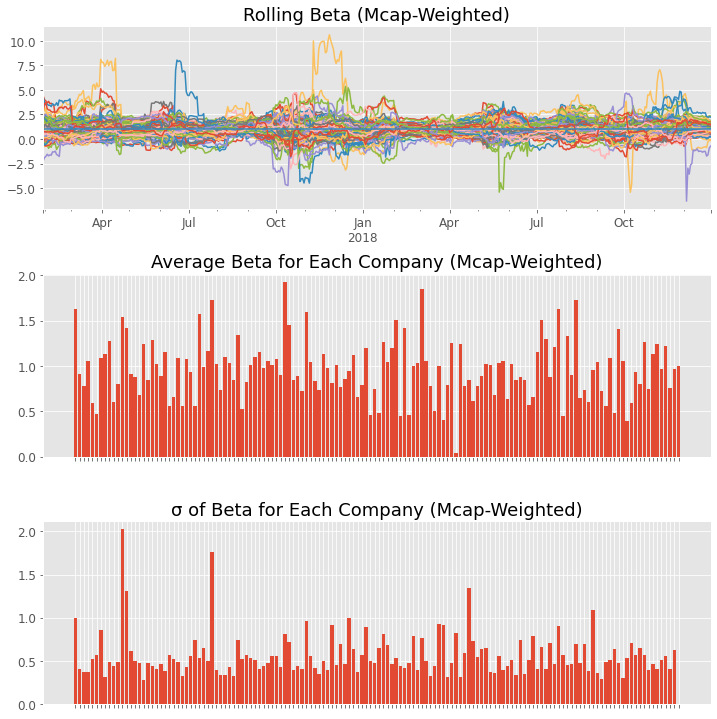

In [21]:
fig, axes = plt.subplots(3,1, figsize=(10,10))
fig.tight_layout()
fig.subplots_adjust(hspace=0.35)


betas_df_w.plot(ax=axes[0], fontsize=12, legend=False); 
axes[0].set_title('Rolling Beta (Mcap-Weighted)', fontsize=18); 

axes[1].bar(betas_stats_w.index, betas_stats_w['mean']); 
axes[1].set_title('Average Beta for Each Company (Mcap-Weighted)', fontsize=18); 
axes[1].set_xticklabels(""); axes[1].tick_params(labelsize=12)

axes[2].bar(betas_stats_w.index, betas_stats_w['std']); 
axes[2].set_title('\u03C3 of Beta for Each Company (Mcap-Weighted)', fontsize=18); 
axes[2].set_xticklabels(""); axes[2].tick_params(labelsize=12)


fig.savefig('Rolling_Betas_with_Stats_Weighted.eps', dpi=200, bbox_inches='tight')

In [22]:
print('average rolling beta among companies (mcap-weighted): ', betas_stats_w['mean'].mean())
print('average \u03C3 among companies (mcap-weighted): ', betas_stats_w['std'].mean())

average rolling beta among companies (mcap-weighted):  0.9616577418388086
average σ among companies (mcap-weighted):  0.5605116938256262


<a id='2.4.5'></a>
### 2.4.5 Arbitrage pricing theory (APT)

*Arbitrage pricing theory* (APT) is the more general form of CAPM. Instead of just using the market risk premium as a factor in its calculations, APT uses multiple economic factors in decomposing the return of an asset. The general APT formula is given by

\begin{equation}
    r_i = \alpha_i + \sum_j \beta_{ij} F_j + \epsilon_i,
\end{equation}

where $\alpha_i$ is the excess return of asset $i$, $\beta_{ij}$ is the exposure of asset $i$ to the $j$th factor $F_j$, and $\epsilon_i$ is the zero-mean residual.

#### (a) Factor returns estimation

Assuming APT holds for a two-factor model, we can write

\begin{equation} \label{eq:36}
    r_i = a + b_{mi} R_m + b_{si} R_s + \epsilon_i,
\end{equation}

where $b_{mi}$ is the exposure to market return, $R_m$, while $b_{si}$ is the exposure to $R_s$, which is the return relevant to the size. Here we assume exposure to size is $b_{si} = \ln(size)$. We can write the equation above in vector format as

\begin{equation}
    \mathbf{r} = \mathbf{B} \mathbf{f} + \mathbf{e},
\end{equation}

where

\begin{equation*}
    \mathbf{r} = 
    \begin{bmatrix}
    r_1 \\
    r_2 \\
    \vdots \\
    r_n \\
    \end{bmatrix},
    \hspace{20pt}
    \mathbf{B} = 
    \begin{bmatrix}
    1      & b_{m1} & b_{s1} \\
    1      & b_{m2} & b_{s2} \\
    \vdots & \vdots & \vdots \\
    1      & b_{mn} & b_{sn} \\
    \end{bmatrix},
    \hspace{20pt}
    \mathbf{f} = 
    \begin{bmatrix}
    a   \\
    R_m \\
    R_s \\
    \end{bmatrix},
    \hspace{20pt}
    \mathbf{e} = 
    \begin{bmatrix}
    \epsilon_1 \\
    \epsilon_2 \\
    \vdots \\
    \epsilon_n \\
    \end{bmatrix}.
\end{equation*}

Since we have the values of $\mathbf{r}$ and $\mathbf{B}$, using the Ordinary Least Squares (OLS) method to minimize the magnitude of $\mathbf{e}$, we can estimate $a$, $R_m$, and $R_s$, i.e.

\begin{equation*}
    \mathbf{r} - \mathbf{B} \mathbf{f} = \mathbf{e} 
\end{equation*}

\begin{align*}
    J(\mathbf{f}) &= (\mathbf{r} - \mathbf{B} \mathbf{f})^T(\mathbf{r} - \mathbf{B} \mathbf{f}) = \mathbf{e}^T\mathbf{e} 
    \hspace{15pt} \text{(Cost func.)}\\
     J(\mathbf{f}) &= \mathbf{r}^T\mathbf{r} 
     - 2\mathbf{f}^T\mathbf{B}^T\mathbf{r}
     + \mathbf{f}^T\mathbf{B}^T\mathbf{B}\mathbf{f} 
\end{align*}

\begin{align}
     \frac{\partial J}{\partial \mathbf{f}} &= 
     -2\mathbf{B}^T\mathbf{r} + 2\mathbf{B}^T\mathbf{B}\mathbf{f}
     = 0 \nonumber \\
     &\Rightarrow \mathbf{B}^T\mathbf{B}\mathbf{f} = \mathbf{B}^T\mathbf{r} \nonumber \\
     &\Rightarrow \mathbf{f} =
     (\mathbf{B}^T\mathbf{B})^{-1}\mathbf{B}^T\mathbf{r}
\end{align}

In [23]:
r = df['ret'].dropna(axis=1).loc[betas_df_w.index]
bm = betas_df_w.iloc[:,:-1]
bs = np.log(mcaps.loc[betas_df_w.index])

In [24]:
factors_df = pd.DataFrame(index=r.index, columns=['a', 'Rm', 'Rs'], dtype='float64')
E = pd.DataFrame(index=r.index, columns=r.columns)

In [25]:
for t in r.index:
    rt = r.loc[t].values.reshape(-1,1)

    bmt = bm.loc[t].values.reshape(-1,1)
    bst = bs.loc[t].values.reshape(-1,1)
    ones = np.ones(bst.shape)
    Bt = np.hstack((ones, bmt, bst))

    ft = np.linalg.inv(Bt.T.dot(Bt)).dot(Bt.T).dot(rt)
    
    factors_df.loc[t] = ft.T
    E.loc[t] = (rt - Bt.dot(ft)).T

#### (b) Analysis of estimated factors

We have the daily values of $a$, $R_m$, and $R_s$ plotted in the figure below, and we present certain statistics of these series in the table below. 

From the table, it is tempting to say that market factor's effect on returns is larger than that of the size factor; however, we should note that the average exposure to market factor is about 1, while the average exposure to size is about 20, which accounts for the gap between the factor return values. We also note that in terms of the Sharpe Ratio, $R_m$ performs worse than the other statistics.


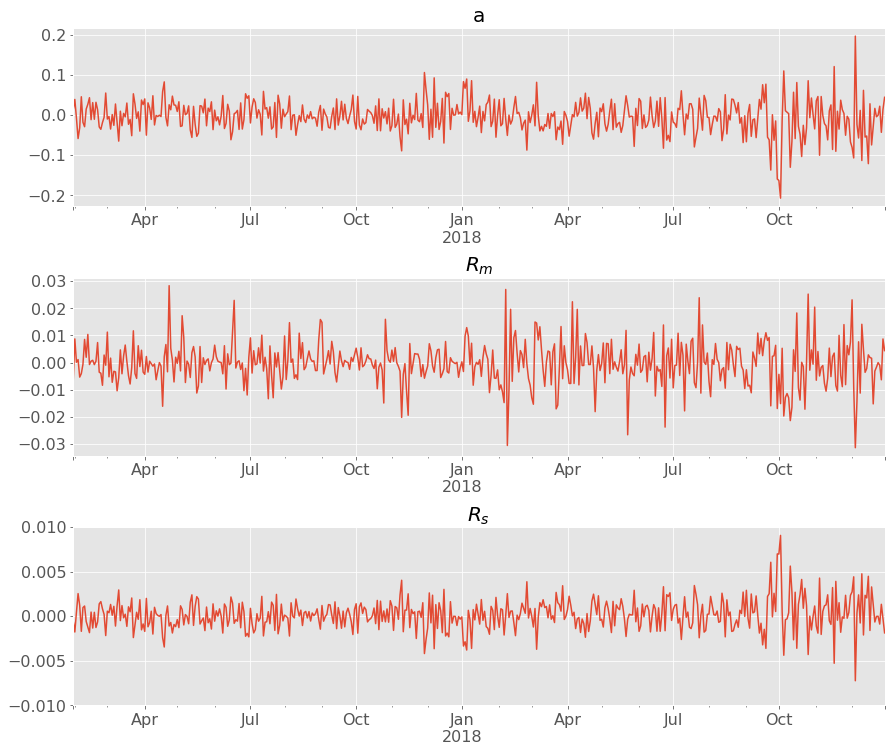

In [26]:
fig, axes = plt.subplots(3,1, figsize=(12,10))
fig.tight_layout()
fig.subplots_adjust(hspace=0.4)

yticks = np.arange(-0.20, 0.21, 0.10)
factors_df['a'].plot(ax=axes[0], yticks=yticks, fontsize=16); axes[0].set_title("a", fontsize=20)

factors_df['Rm'].plot(ax=axes[1], fontsize=16); axes[1].set_title("$R_m$", fontsize=20)

yticks = np.arange(-0.010, 0.011, 0.005)
factors_df['Rs'].plot(ax=axes[2], yticks=yticks, fontsize=16); axes[2].set_title("$R_s$", fontsize=20)


fig.savefig('Estimated_Factors.eps', dpi=200, bbox_inches='tight')

In [27]:
factor_stats = pd.DataFrame(columns=['a', 'Rm', 'Rs'], index=['mean', 'std', '|mean/std|'])
factor_stats['a'] = [factors_df['a'].mean(), factors_df['a'].std(), abs(factors_df['a'].mean()/factors_df['a'].std())]
factor_stats['Rm'] = [factors_df['Rm'].mean(), factors_df['Rm'].std(), abs(factors_df['Rm'].mean()/factors_df['Rm'].std())]
factor_stats['Rs'] = [factors_df['Rs'].mean(), factors_df['Rs'].std(), abs(factors_df['Rs'].mean()/factors_df['Rs'].std())]
factor_stats

,a,Rm,Rs
mean,-0.004216,-0.000286,0.000192
std,0.041191,0.007913,0.001732
|mean/std|,0.102344,0.036139,0.111060


#### (c) Correlation between return and specific return

In this section, we investigate the correlation between returns, $r_i$, and specific returns, $\epsilon_i$. In the figure below, on the left we have a scatter plot of $r_i$ and $\epsilon_i$, which indicates a clear and strong correlation between these values. The histogram on the right supports this argument as all the correlation values are larger than 0.60 with the majority of them being close to 1 with an average value of 0.81.

Because $\epsilon_i$ represents the residual return that is not accounted for with the factors used in the APT model, its high correlation with actual returns indicates that the two factors used in the model are not sufficient to decompose the returns.

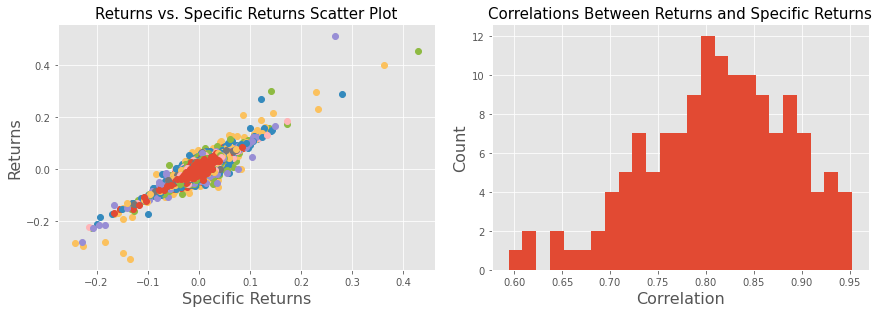

In [28]:
fig, axes = plt.subplots(1,2, figsize=(12,4))
fig.tight_layout()
fig.subplots_adjust(wspace=0.15)


for company in E.columns:
    axes[0].plot(E[company], r[company], 'o')

axes[0].set_title('Returns vs. Specific Returns Scatter Plot', fontsize=15)
axes[0].set_xlabel('Specific Returns', fontsize=16)
axes[0].set_ylabel('Returns', fontsize=16)


return_sreturn_corr = pd.Series(index=E.columns, dtype='float64')
for company in E.columns:
    return_sreturn_corr[company] = stats.pearsonr(E[company], r[company])[0]

return_sreturn_corr.hist(ax=axes[1], bins=25)
axes[1].set_title('Correlations Between Returns and Specific Returns', fontsize=15)
axes[1].set_xlabel('Correlation', fontsize=16)
axes[1].set_ylabel('Count', fontsize=16)



fig.savefig('Returns_and_Specific_Returns_Correlation.png', dpi=200, bbox_inches='tight')

In [29]:
print('Average correlation: ', return_sreturn_corr.mean())

Average correlation:  0.8114918953521872


#### (d) Correlation between factor returns

In [30]:
R = factors_df[['Rm', 'Rs']]

window = 22
rolling_R_covs = []
rolling_stats = pd.DataFrame(columns=['magnitude', 'max change'], index= R.index[window-1:]) 

for i in range(0, len(R)-window+1):
    Rt = R.iloc[i:i+window]
    t = R.index[i+window-1]
    cov_Rt = Rt.cov()
    
    rolling_R_covs.append(cov_Rt)
    rolling_stats.loc[t]['magnitude'] = np.linalg.norm(cov_Rt)
    if i != 0:
        cov_Rt_prev = rolling_R_covs[i-1]
        changes = abs((cov_Rt - cov_Rt_prev) / cov_Rt_prev)
        rolling_stats.loc[t]['max change']  = changes.stack().max()

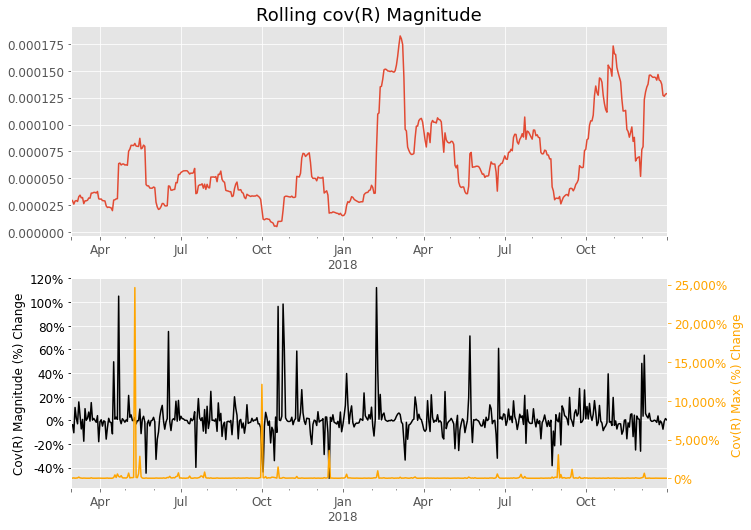

In [31]:
fig, axes = plt.subplots(2,1, figsize=(9,7))
fig.tight_layout()
fig.subplots_adjust(hspace=0.2)

rolling_stats['magnitude'].plot(ax=axes[0], fontsize=12); axes[0].set_title("Rolling cov(R) Magnitude", fontsize=18)


rolling_stats['magnitude'].pct_change().plot(ax=axes[1], fontsize=12, style ='black')
axes[1].tick_params(axis='y', colors='black')
ticks = axes[1].get_yticks()
axes[1].set_yticklabels(['{:,.0%}'.format(x) for x in ticks]);
axes[1].set_ylabel('Cov(R) Magnitude (%) Change', color='black')


twinax = axes[1].twinx()
rolling_stats['max change'].plot(ax=twinax, style ='orange', fontsize=12)
twinax.tick_params(axis='y', colors='orange')
ticks = twinax.get_yticks()
twinax.set_yticklabels(['{:,.0%}'.format(x) for x in ticks]);
twinax.set_ylabel('Cov(R) Max (%) Change ', color='orange')
twinax.grid(None)


fig.savefig('Rolling_CovR.eps', dpi=200, bbox_inches='tight')

#### (e) Covariance and PCA of Specific Returns

From part (a), we have for every company, $i$, and for every day, $t$, the specific return $\epsilon_{i,t}$, which is computed as the difference between the actual and estimated company returns. We then construct the following matrix, $\mathbf{E}$:

\begin{equation*}
    \mathbf{E} = 
    \begin{bmatrix}
    \epsilon_{1,0} & \cdots & \epsilon_{141,0} \\
    \epsilon_{1,1} & \cdots & \epsilon_{141,1} \\
    \vdots & \ddots & \vdots \\
    \epsilon_{1,500} & \cdots & \epsilon_{141,500} \\
    \end{bmatrix}_{500 \times 141}.
\end{equation*}

We first compute the covariance matrix of these specific returns, $\text{cov}(\mathbf{E}) \in \mathbb{R}^{141 \times 141}$. Then, we do *Principal Component Analysis* (PCA) on this matrix.

PCA is a dimensionality reduction method, carried out by eigenvalue decomposition. The idea is that the largest eigenvalues and their corresponding eigenvectors captures the principal behavior of the matrix. Therefore, for this example, the corresponding eigenvectors of the largest eigenvalues represent the directions in which the most variation happens.

The figure below plots the eigenvalues in descending order in black, and the cumulative percentage of explained variance by the eigen-components in yellow. We observe that the larger eigenvalues capture most of the variance and compute that the largest eigenvalue and its corresponding eigenvector (first principal component) explains 7.37\% of the total variance.

In [32]:
covE = E.astype(float).cov()
eigvals, eigvecs = np.linalg.eigh(covE)
cum_explained_var = np.cumsum(eigvals[::-1]/sum(eigvals))

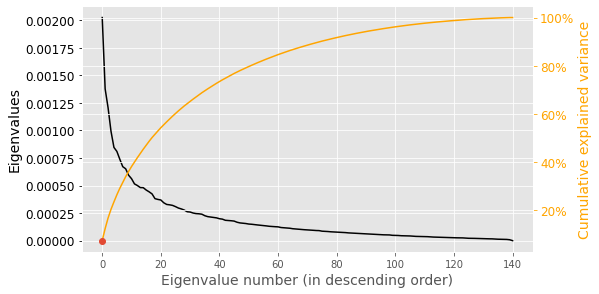

In [33]:
fig, ax = plt.subplots(1,1, figsize=(7,4))
fig.tight_layout()

ax.plot(eigvals[::-1], color ='black')
ax.tick_params(axis='y', colors='black', labelsize=12)
ax.set_ylabel('Eigenvalues', color='black', fontsize=14)
ax.set_xlabel('Eigenvalue number (in descending order)', fontsize=14)


twinax = ax.twinx()
twinax.plot(cum_explained_var, color='orange')
twinax.tick_params(axis='y', colors='orange', labelsize=12)
ticks = twinax.get_yticks()
twinax.set_yticklabels(['{:,.0%}'.format(x) for x in ticks]);
twinax.set_ylabel('Cumulative explained variance', color='orange', fontsize=14)


twinax.plot(eigvals[-1], eigvals[-1]/sum(eigvals), 'o')


fig.savefig('PCA_Explained_Variance.eps', dpi=200, bbox_inches='tight')

In [34]:
print('Percentage of the variance explained by the first principal component: {:.2%}'.format(eigvals[-1]/sum(eigvals)))

Percentage of the variance explained by the first principal component: 7.37%
